<a href="https://colab.research.google.com/github/Pooret/jokes/blob/main/jokes_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# custom functions
#from utils import evaluate_model, populate_pos_class

### Read-in and explore the dataset

In [46]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from tqdm import tqdm


def evaluate_model(true, pred, predicted_prob):

    classes = np.unique(true)
    y_val_array = pd.get_dummies(true, drop_first=False).values

    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(true, pred)
    auc = metrics.roc_auc_score(true, pred)
    print("Accuracy:",  round(accuracy ,2))
    print("Auc:", round(auc ,2))
    print("Detail:")
    print(metrics.classification_report(true, pred))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(true, pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_val_array[: ,i],
                               predicted_prob[: ,i])
        ax[0].plot(fpr, tpr, lw=3,
                  label='{0} (area={1:0.2f})'.format(classes[i],
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0 ,1], [0 ,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05 ,1.0], ylim=[0.0 ,1.05],
              xlabel='False Positive Rate',
              ylabel="True Positive Rate (Recall)",
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_val_array[: ,i], predicted_prob[: ,i])
        ax[1].plot(recall, precision, lw=3,
                   label='{0} (area={1:0.2f})'.format(classes[i],
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0 ,1.05], ylim=[0.0 ,1.05], xlabel='Recall',
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

def populate_pos_class(df, lower_bound=1, upper_bound=1500, class_size=10000):

    max_class_size = len(df[df['score'] == 0])
    if class_size > max_class_size:
      print(f'maximum sampling size is {max_class_size}\n proceeding with this value...')
      class_size = max_class_size
    best_score_for_binary_class = find_best_score(df, lower_bound, upper_bound, class_size)
    

    # create mask of best score for binary classification and use it to update the class size
    pos_class_mask = df['score'] > best_score_for_binary_class
    updated_class_size = len(df[pos_class_mask])

    if updated_class_size > max_class_size:
        updated_class_size = max_class_size

    # if number of elements is less than desired class size
    if updated_class_size < class_size:
        print('WARNING, CURRENT PARAMETERS RESULT IN CLASS SIZE REDUCTION')
        print(f'desired size {class_size}')
        print(f'current size {updated_class_size}')

    return pos_class_mask, updated_class_size

def find_best_score(df, lower_bound, upper_bound, class_size):

  print(5*'*', 'calculating', 5*'*')

  # iterate over score range and get distance
  for score in range(lower_bound, upper_bound):

    num_samples = len(df[df['score'] > score])
    dist = num_samples - class_size

    if dist <= 0:
      return score

  return score

In [47]:
# extract the data
df = pd.read_csv('https://query.data.world/s/htrdsouy327xqa4w457qx6k6sjtj6r')

In [48]:
# examine the data
df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i/i_am_soooo_glad_im_not_circumcised/,self.jokes,NaN,My corona is covered with foreskin so it is not exposed to viruses.,I am soooo glad I'm not circumcised!,2
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup/did_you_know_google_now_has_a_platform_for/,self.jokes,NaN,It's called Google Sheets.,Did you know Google now has a platform for recording your bowel movements?,9
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj/what_is_the_difference_between_my_wife_and_my/,self.jokes,NaN,"The vacuum doesn't snore after sex.\n\n&amp;#x200B;\n\nApril fools, I don't have a wife.",What is the difference between my wife and my vacuum?,15
3,post,ftbnxh,2qh72,jokes,False,1585785428,https://old.reddit.com/r/Jokes/comments/ftbnxh/my_last_joke_for_now/,self.jokes,NaN,[removed],My last joke for now.,9
4,post,ftbjpg,2qh72,jokes,False,1585785009,https://old.reddit.com/r/Jokes/comments/ftbjpg/the_nintendo_64_turns_18_this_week/,self.jokes,NaN,[removed],The Nintendo 64 turns 18 this week...,134


In [49]:
df.shape

(1000000, 12)

In [50]:
pd.options.display.max_colwidth = None
df[['title', 'selftext', 'score']].head(30)

,title,selftext,score
0,I am soooo glad I'm not circumcised!,My corona is covered with foreskin so it is not exposed to viruses.,2
1,Did you know Google now has a platform for recording your bowel movements?,It's called Google Sheets.,9
2,What is the difference between my wife and my vacuum?,"The vacuum doesn't snore after sex.\n\n&amp;#x200B;\n\nApril fools, I don't have a wife.",15
3,My last joke for now.,[removed],9
4,The Nintendo 64 turns 18 this week...,[removed],134
5,Sex with teacher.,[removed],1
6,Another long one.,[removed],8
7,What did the French man say to the attractive teletubby?,Oo..lala...,2
8,A Priest takes a walk down to the docks one day,[removed],88
9,A long joke.,[removed],4


In [51]:
df['score'].describe()

count    1000000.000000
mean         139.691119
std         1674.046005
min            0.000000
25%            0.000000
50%            1.000000
75%            7.000000
max       142733.000000
Name: score, dtype: float64

(array([9.96936e+05, 2.02700e+03, 8.14000e+02, 1.70000e+02, 3.50000e+01,
        8.00000e+00, 6.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([     0. ,  14273.3,  28546.6,  42819.9,  57093.2,  71366.5,
         85639.8,  99913.1, 114186.4, 128459.7, 142733. ]),
 <a list of 10 Patch objects>)

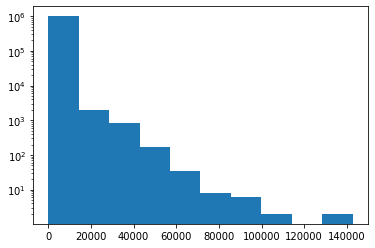

In [52]:
plt.hist(df['score'], log=True)

In [53]:
# define some parameters 
CLASS_SIZE = 10000
TRAIN_SIZE = 0.90
MIN_UPVOTES = df['score'].min()
MAX_UPVOTES = df['score'].max()
TITLE_MAX_LEN = 500
SELFTEXT_MAX_LEN = 500

In [54]:
# boolean masks

# where selftext isnull (no punchline)
is_null = df['selftext'].isnull()

# where title or post were removed by reddit user/mod
removed = (df['selftext'] == '[removed]') | (df['title'] == '[removed]')

# where tile or post were deleted by the original poster
deleted = (df['selftext'] == '[deleted]') | (df['title'] == '[deleted]')

# where upvotes is 0 (reddit automatically provides user 1 upvote)
neg_class = df['score'] == 0

In [55]:
# get entries that aren't removed or deleted
df_cleaned = df[~removed][~deleted]
df_cleaned.shape

(578634, 12)

In [56]:

# what are nans?
df_cleaned[df_cleaned['score'] > 200][is_null][['title', 'selftext', 'score']].head(10)

,title,selftext,score
281318,"What has 4 letters, sometimes 9 letters, but never has 5 letters.",NaN,282
308797,What happens when you cross a joke with a rhetorical question?,NaN,3938
467745,"Welcome To /r/Jokes, Home Of The New England Patriots",NaN,336
625315,The funniest /r/jokes has ever been,NaN,67950
914649,Shout out to people who don't know the opposite of in,NaN,4580
914685,"I almost got raped in jail one time. I tell you, my family takes Monopoly way too seriously.",NaN,275
915011,"Day 19, I have successfully conditioned my master to smile and write in his book every time I drool.- Pavlov's Dog",NaN,282
915628,"My friend Victor changed his last name to ""E"". No one knows why. He's become a Mystery.",NaN,950
915738,"I can't remember where I read this, but I heard too much masturbating causes memory loss.",NaN,294
915783,5 out of 6 scientists say Russian Roulette is safe.,NaN,10085


In [57]:
# Filter entries that are short, but meet other necessary criteria
# # remove unnecessary whitespace 
df_cleaned[['selftext', 'title']] = df_cleaned[['selftext', 'title']].applymap(lambda x:" ".join(str(x).split()))
df_cleaned['selftext_len'] = df_cleaned['selftext'].str.len()
df_cleaned['title_len'] = df_cleaned['title'].str.len()

# boolean masks
title_window = (df_cleaned['title_len'] > 0) & (df_cleaned['title_len'] < TITLE_MAX_LEN)
selftext_window = (df_cleaned['selftext_len'] > 0) & (df_cleaned['selftext_len'] < SELFTEXT_MAX_LEN)

# apply masks to filter
df_cleaned = df_cleaned[selftext_window & title_window]
print(f"{len(df_cleaned[~neg_class])} samples match")

409626 samples match


In [58]:
# returns boolean mask and updated_class sizes for binary classification.
# boolean mask is for instances in the positive class that meet arguments

pos_class_mask, updated_class_size = populate_pos_class(df_cleaned, MIN_UPVOTES, MAX_UPVOTES, CLASS_SIZE)

***** calculating *****
WARNING, CURRENT PARAMETERS RESULT IN CLASS SIZE REDUCTION
desired size 10000
current size 9998


### Make the positive and negative class labels and concatenate the dataframe

         count         mean           std    min     25%     50%      75%  \
target                                                                      
False   9998.0     0.000000      0.000000    0.0     0.0     0.0      0.0   
True    9998.0  8717.526105  11459.530086  960.0  1580.0  3154.0  11723.5   

             max  
target            
False        0.0  
True    142733.0  


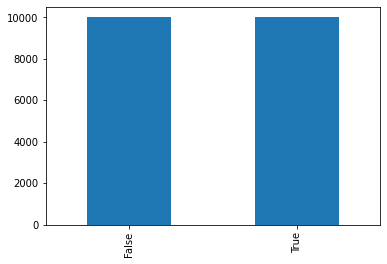

In [59]:
# create target label
df_cleaned['target'] = pos_class_mask
df_concat = pd.concat([df_cleaned[neg_class].sample(updated_class_size), df_cleaned[pos_class_mask]], axis=0)
print(df_concat.groupby('target').describe()['score'])
df_concat['target'].value_counts().plot(kind='bar')

### Examine Timeseries Data

In [60]:
# making unix created_times into readable timestamps
def make_tz_timestamp(unix_ts, tz='US/Eastern'):
    from datetime import datetime
    import pytz
    timezone = pytz.timezone(tz)
    # convert unix utc to timestamp utc
    ts = datetime.utcfromtimestamp(unix_ts)
    # return is to that it is tz-aware
    #return timezone.localize(ts)
    return ts

df_concat['created_at'] = df_concat['created_utc'].apply(lambda x: make_tz_timestamp(x))
df_concat[['created_at', 'title', 'selftext', 'target']].head()

,created_at,title,selftext,target
142867,2019-08-08 22:26:10,Whoever has my voodoo doll...,Can you please suck it’s toes?,False
872578,2016-04-19 23:33:56,What do you call a pompous piece of bread?,A braguette.,False
503401,2017-12-05 08:12:38,"Disney, Frozen is played out at this point...",Let it go!,False
796887,2016-09-19 06:57:04,A few hours ago it raining like hell outside that my windows was all fogged up.,"But ""I can see clearly now the rain has gone!""",False
44340,2020-01-24 14:13:41,A friend of mine died of ‘the big C’,They drowned in the Pacific,False


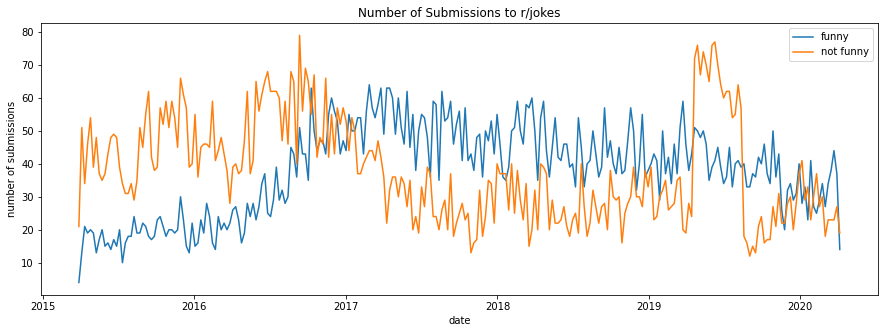

In [61]:
# plot submissions
plt.figure(figsize=(15, 5))
data_good = df_concat[df_concat['target']==True].set_index('created_at', drop=True).resample('W').count()
data_bad = df_concat[df_concat['target']==False].set_index('created_at', drop=True).resample('W').count()
sns.lineplot(x=data_good.index, y='type', data=data_good, label='funny')
sns.lineplot(x=data_bad.index, y='type', data=data_bad, label='not funny')
plt.title('Number of Submissions to r/jokes')
plt.xlabel('date')
plt.ylabel('number of submissions')
plt.legend()
plt.show()

### Split into train/test

In [62]:
# prepare the dataframe
training_size = int(len(df_concat)*TRAIN_SIZE)
df_concat_shuffled = df_concat.sample(len(df_concat)).reset_index(drop=True)
df_concat_shuffled['selftext'] = df_concat_shuffled['selftext'].fillna(value='emptypunchline')
train = df_concat_shuffled[:training_size]
test = df_concat_shuffled[training_size:]
print(train.shape, test.shape)

(17996, 16) (2000, 16)


### Examine Features in Data

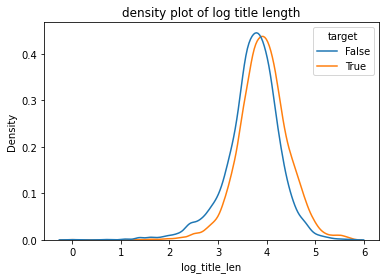

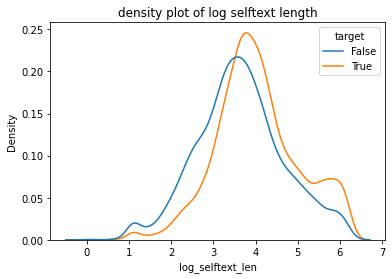

In [67]:
train['log_title_len'] = np.log(train['title_len'])
train['log_selftext_len'] = np.log(train['selftext_len'])

funny_df = train[train['target'] == True]
not_funny_df = train[train['target'] == False]


sns.kdeplot(x='log_title_len', data=train, hue='target')
plt.title('density plot of log title length')
plt.show()
train['log_selftext_len'] = np.log(train['selftext_len'])
sns.kdeplot(x='log_selftext_len', data=train, hue='target')
plt.title('density plot of log selftext length')
plt.show()


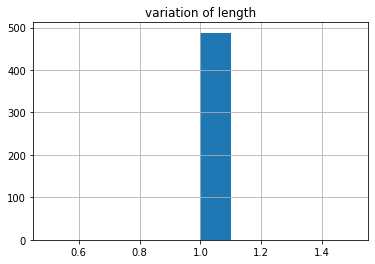

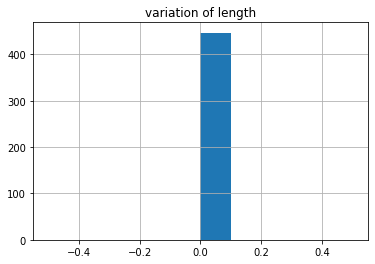

In [68]:

funny_df.groupby(['log_selftext_len']).mean()['target'].hist()
plt.title('variation of length')
plt.show()
not_funny_df.groupby(['log_selftext_len']).mean()['target'].hist()
plt.title('variation of length')
plt.show()

### Text Preprocessing

In [61]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
import re
import spacy
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from pprint import pprint

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [62]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text, deacc=True):
      result.append(token)
  return result

In [63]:
train['all_text'] = train['title'] + " " + train['selftext']
#train['processed'] = train['all_text'].apply(lambda x: clean_text(x))
train['processed'] = train['all_text'].apply(lambda x: token for toekn in gensim.utils.simple_preprocess(text, deacc=True))

In [65]:
processed_funny = funny_df['processed'].tolist()
processed_not_funny = not_funny_df['processed'].tolist()

funny_dictionary = gensim.corpora.Dictionary(processed_funny)
not_funny_dictionary = gensim.corpora.Dictionary(processed_not_funny)

# bigram and trigram models
bigram_funny = gensim.models.Phrases(processed_funny, min_count=5, threshold=100)
bigram_not_funny = gensim.models.Phrases(processed_not_funny, min_count=5, threshold=100)

trigram_funny = gensim.models.Phrases(bigram_funny[processed_funny], threshold=100)
trigram_not_funny = gensim.models.Phrases(bigram_not_funny[processed_not_funny], threshold=100)

In [66]:
!python3 -m spacy download en_core_web_lg

2022-08-15 22:31:15.421625: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 7.9 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [67]:
bigram_mod_funny = gensim.models.phrases.Phraser(bigram_funny)
bigram_mod_not_funny = gensim.models.phrases.Phraser(bigram_not_funny)

trigram_mod_funny = gensim.models.phrases.Phraser(trigram_funny)
trigam_mod_not_funny = gensim.models.phrases.Phraser(trigram_not_funny)


nlp = spacy.load('en_core_web_lg')

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts, bigram_mod):
  return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, trigram_mod, bigram_mod):
  return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN', 'SYM', 'NUM', 'AUX', 'ADP']):
  texts_out = []
  for sent in tqdm(texts):
    doc = nlp(" ".join(sent))
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return texts_out



In [68]:
# Create a corpus of funny jokes

# preprocessing steps
processed_funny_nostops = remove_stopwords(processed_funny)
processed_funny_bigrams = make_bigrams(processed_funny_nostops, bigram_mod_funny)
processed_funny_lemmatized = lemmatization(processed_funny_bigrams)

# create index_word mapping and filter extremes
id2word_funny = gensim.corpora.Dictionary(processed_funny_lemmatized)
id2word_funny.filter_extremes(no_below=5, no_above=0.5)

# create corpus
funny_corpus = [id2word_funny.doc2bow(text) for text in processed_funny_lemmatized]

100%|██████████| 17959/17959 [03:42<00:00, 80.72it/s] 


In [69]:
# Create a corpus of un-funny jokes

# preprocessing steps
processed_not_funny_nostops = remove_stopwords(processed_not_funny)
processed_not_funny_bigrams = make_bigrams(processed_not_funny_nostops, bigram_mod_not_funny)
processed_not_funny_lemmatized = lemmatization(processed_not_funny_bigrams)

# create index_word mapping and filter extremes
id2word_not_funny = gensim.corpora.Dictionary(processed_not_funny_lemmatized)
id2word_not_funny.filter_extremes(no_below=5, no_above=0.5)
# create corpus
not_funny_corpus = [id2word_not_funny.doc2bow(text) for text in processed_not_funny_lemmatized]

100%|██████████| 18032/18032 [02:52<00:00, 104.44it/s]


### Building the topic models

In [102]:
lda_model_funny = gensim.models.ldamodel.LdaModel(corpus = funny_corpus,
                                                  id2word = id2word_funny,
                                                  num_topics=30,
                                                  random_state=0,
                                                  update_every=1,
                                                  chunksize=200,
                                                  passes=10,
                                                  alpha='auto',
                                                  per_word_topics=True)

In [103]:
lda_model_not_funny = gensim.models.ldamodel.LdaModel(corpus = not_funny_corpus,
                                                  id2word = id2word_not_funny,
                                                  num_topics=30,
                                                  random_state=0,
                                                  update_every=1,
                                                  chunksize=200,
                                                  passes=10,
                                                  alpha='auto',
                                                  per_word_topics=True)

In [104]:
# pprint(lda_model_funny.print_topics())
# doc_lda_funny = lda_model_funny[funny_corpus]

In [105]:
# pprint(lda_model_not_funny.print_topics())
# doc_lda_not_funny = lda_model_not_funny[not_funny_corpus]

In [106]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_funny.log_perplexity(funny_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_funny = CoherenceModel(model=lda_model_funny, texts=processed_funny_lemmatized, dictionary=id2word_funny, coherence='c_v')
coherence_lda_funny = coherence_model_lda_funny.get_coherence()
print('\nCoherence Score: ', coherence_lda_funny)


Perplexity:  -7.241703046217651

Coherence Score:  0.4109225283388344


In [107]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_funny, funny_corpus, id2word_funny)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.448388 -0.149101       1        1  14.091456
17    -0.123790  0.451075       2        1   4.757910
28    -0.020303  0.006950       3        1   3.980351
12    -0.028804  0.018211       4        1   3.657346
14    -0.002619 -0.007589       5        1   3.653614
25    -0.007266 -0.003711       6        1   3.464467
1     -0.004389 -0.004035       7        1   3.425157
29    -0.001322 -0.006281       8        1   3.379316
0     -0.000344 -0.008049       9        1   3.371512
9      0.010692 -0.011405      10        1   3.290771
23    -0.008355 -0.000660      11        1   3.176975
13     0.006278 -0.007576      12        1   3.027608
4      0.027681 -0.015404      13        1   2.908822
8      0.013322 -0.009606      14        1   2.891900
6      0.021481 -0.013410      15        1   2.865446
21     0.025747 -0.016931      16        1   2.855781
24     0.028749 -0.015024      17        1   2.816032
20     0.022178 -0.012154      18        1   2.790551
16     0.025561 -0.013588      19        1   2.750605
22     0.040120 -0.016930      20        1   2.722620
5      0.026222 -0.014509      21        1   2.717727
10     0.018548 -0.011644      22        1   2.702994
18     0.031202 -0.014639      23        1   2.639157
27     0.041943 -0.017346      24        1   2.635746
15     0.036900 -0.016404      25        1   2.612424
26     0.045492 -0.017190      26        1   2.311388
11     0.051020 -0.017531      27        1   2.273302
19     0.056915 -0.019471      28        1   2.249073
3      0.052731 -0.017728      29        1   2.175009
2      0.062799 -0.018321      30        1   1.804938, topic_info=       Term         Freq        Total Category  logprob  loglift
40      say  6059.000000  6059.000000  Default  30.0000  30.0000
253     man  2731.000000  2731.000000  Default  29.0000  29.0000
26     wife  1839.000000  1839.000000  Default  28.0000  28.0000
19      get  2977.000000  2977.000000  Default  27.0000  27.0000
205      go  2613.000000  2613.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1359    lip    39.533440    40.473517  Topic30  -4.5932   3.9911
2181  smart    39.259437    40.199514  Topic30  -4.6002   3.9910
2098  twist    37.856995    38.797072  Topic30  -4.6365   3.9901
1652   cure    35.446630    36.386707  Topic30  -4.7023   3.9885
765   crack    35.167021    36.107098  Topic30  -4.7103   3.9883

[930 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
247      10  0.989299          able
2832     12  0.973523         abuse
311      15  0.979257  accidentally
1759     20  0.984895        across
964      17  0.993711      actually
...     ...       ...           ...
785      16  0.977205     years_ago
854       8  0.996738          yell
41       17  0.994278     yesterday
1449     11  0.989310           yet
1187      2  0.997543         young

[901 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 18, 29, 13, 15, 26, 2, 30, 1, 10, 24, 14, 5, 9, 7, 22, 25, 21, 17, 23, 6, 11, 19, 28, 16, 27, 12, 20, 4, 3])

In [108]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_not_funny.log_perplexity(not_funny_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_not_funny = CoherenceModel(model=lda_model_not_funny, texts=processed_not_funny_lemmatized, dictionary=id2word_not_funny, coherence='c_v')
coherence_lda_not_funny = coherence_model_lda_not_funny.get_coherence()
print('\nCoherence Score: ', coherence_lda_not_funny)


Perplexity:  -7.4278485261452944

Coherence Score:  0.45052652448589653


In [109]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_not_funny, not_funny_corpus, id2word_not_funny)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.433190 -0.175267       1        1  6.773181
22     0.068390  0.262471       2        1  4.774323
14     0.078076  0.305711       3        1  4.346311
28     0.048261  0.104697       4        1  4.301734
5      0.032297  0.049972       5        1  4.085042
12     0.015745  0.018204       6        1  3.985015
4      0.021347  0.028058       7        1  3.913722
1      0.019670  0.025117       8        1  3.740716
13    -0.005462 -0.010437       9        1  3.503169
29    -0.013576 -0.016326      10        1  3.450786
25    -0.025326 -0.027579      11        1  3.404675
26     0.004860  0.004442      12        1  3.356729
27    -0.014261 -0.017462      13        1  3.325955
17    -0.008730 -0.011419      14        1  3.277620
11    -0.011498 -0.014003      15        1  3.225218
3     -0.009150 -0.010663      16        1  3.145588
15    -0.028338 -0.028995      17        1  3.007087
10    -0.028711 -0.027654      18        1  2.965879
8     -0.034787 -0.031916      19        1  2.941605
23    -0.029934 -0.028291      20        1  2.924513
6     -0.032828 -0.030004      21        1  2.897633
20    -0.051400 -0.040799      22        1  2.803067
2     -0.034881 -0.031660      23        1  2.700015
21    -0.047603 -0.038687      24        1  2.677228
18    -0.054481 -0.041017      25        1  2.538913
19    -0.054199 -0.041722      26        1  2.480049
7     -0.054821 -0.041305      27        1  2.469786
24    -0.061150 -0.044290      28        1  2.376711
9     -0.062413 -0.044907      29        1  2.316894
0     -0.058286 -0.044267      30        1  2.290838, topic_info=         Term         Freq        Total Category  logprob  loglift
54        say  3319.000000  3319.000000  Default  30.0000  30.0000
132       get  2176.000000  2176.000000  Default  29.0000  29.0000
46         go  1806.000000  1806.000000  Default  28.0000  28.0000
2        call  1724.000000  1724.000000  Default  27.0000  27.0000
75        man  1562.000000  1562.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1736      rip    30.220615    31.155254  Topic30  -4.8051   3.7458
2706    birth    29.097365    30.032004  Topic30  -4.8429   3.7446
160   clinton    28.393039    29.327678  Topic30  -4.8675   3.7439
2016     left    27.953137    28.887776  Topic30  -4.8831   3.7434
2008    chris    26.844504    27.779143  Topic30  -4.9235   3.7420

[930 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
190      19  0.990165          able
1184     24  0.969038      accident
627      22  0.979715  accidentally
575      16  0.984565       account
325      26  0.983382        across
...     ...       ...           ...
196      19  0.997796          year
278      20  0.996819      year_old
1548     22  0.990539          yell
850      12  0.979381     yesterday
130      14  0.993544         young

[900 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 23, 15, 29, 6, 13, 5, 2, 14, 30, 26, 27, 28, 18, 12, 4, 16, 11, 9, 24, 7, 21, 3, 22, 19, 20, 8, 25, 10, 1])

In [ ]:
from gensim import corpora, models
funny_vect = models.TfidfModel(funny_bow_corpus)
funny_tfidf = funny_vect[funny_bow_corpus]
funny_lda_model = gensim.models.LdaMulticore(funny_bow_corpus, num_topics=20, id2word=funny_dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in funny_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.027*"job" + 0.021*"get" + 0.014*"differ" + 0.012*"fire" + 0.012*"letter" + 0.011*"lose" + 0.009*"fart" + 0.009*"happi" + 0.008*"know" + 0.008*"condom"
Topic: 1 
Words: 0.061*"bar" + 0.058*"say" + 0.057*"walk" + 0.039*"drink" + 0.032*"bartend" + 0.032*"guy" + 0.020*"priest" + 0.019*"beer" + 0.018*"ask" + 0.016*"order"
Topic: 2 
Words: 0.062*"like" + 0.018*"cow" + 0.018*"red" + 0.015*"say" + 0.015*"eat" + 0.013*"look" + 0.013*"women" + 0.012*"eye" + 0.010*"john" + 0.008*"blue"
Topic: 3 
Words: 0.038*"joke" + 0.022*"good" + 0.021*"like" + 0.014*"funni" + 0.014*"hear" + 0.012*"men" + 0.012*"guy" + 0.011*"gay" + 0.011*"engin" + 0.011*"work"
Topic: 4 
Words: 0.036*"boy" + 0.026*"say" + 0.025*"mom" + 0.023*"ask" + 0.020*"mother" + 0.019*"kid" + 0.018*"girl" + 0.015*"bear" + 0.015*"littl" + 0.013*"day"
Topic: 5 
Words: 0.028*"car" + 0.022*"play" + 0.019*"cop" + 0.017*"say" + 0.014*"drive" + 0.013*"go" + 0.013*"hors" + 0.013*"park" + 0.011*"pull" + 0.011*"know"
Topic: 6 
Word

In [ ]:
funny_lda_model.log_perplexity(funny_bow_corpus)

-7.910358956372687

In [ ]:
funny_coherence_model = CohereModel(model=funny_lda_model, texts = )

In [ ]:
not_funny_vect = models.TfidfModel(not_funny_bow_corpus)
not_funny_tfidf = not_funny_vect[not_funny_bow_corpus]
not_funny_lda_model = gensim.models.LdaMulticore(not_funny_bow_corpus, num_topics=20, id2word=not_funny_dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in not_funny_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.032*"eat" + 0.016*"dick" + 0.015*"differ" + 0.015*"god" + 0.012*"pay" + 0.011*"win" + 0.010*"million" + 0.009*"obama" + 0.009*"go" + 0.008*"jam"
Topic: 1 
Words: 0.031*"year" + 0.029*"chicken" + 0.029*"cross" + 0.027*"wife" + 0.026*"sex" + 0.025*"road" + 0.021*"friend" + 0.019*"old" + 0.018*"teacher" + 0.014*"say"
Topic: 2 
Words: 0.078*"trump" + 0.058*"knock" + 0.041*"donald" + 0.024*"nan" + 0.015*"joke" + 0.013*"nazi" + 0.012*"number" + 0.012*"afraid" + 0.011*"polic" + 0.010*"orang"
Topic: 3 
Words: 0.020*"blond" + 0.013*"hair" + 0.012*"state" + 0.012*"eleph" + 0.012*"peopl" + 0.011*"laugh" + 0.011*"fact" + 0.010*"go" + 0.010*"cut" + 0.008*"hand"
Topic: 4 
Words: 0.025*"game" + 0.015*"line" + 0.013*"play" + 0.012*"fli" + 0.012*"hear" + 0.009*"high" + 0.009*"food" + 0.009*"video" + 0.009*"smoke" + 0.008*"pick"
Topic: 5 
Words: 0.023*"job" + 0.016*"news" + 0.014*"work" + 0.012*"bird" + 0.012*"glass" + 0.011*"joke" + 0.010*"new" + 0.010*"eat" + 0.010*"get" + 0.009*"po

In [ ]:
from sklearn.feature_selection import chi2 as x2

y = train['target']
X_names = cv.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = x2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

NameError: name 'cv' is not defined

In [ ]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# False:
  . selected features: 3595
  . top features: and,apparently,asked,asked me,but,call,dad,did,did the,do
 
# True:
  . selected features: 3595
  . top features: and,apparently,asked,asked me,but,call,dad,did,did the,do
 


### Examine Text Metadata 

In [ ]:
train.columns

Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'url', 'selftext', 'title',
       'score', 'selftext_len', 'title_len', 'target', 'created_at'],
      dtype='object')

In [ ]:
# train['selftext_len'] = train['selftext'].str.len()
# train['title_len'] = train['title'].str.len()

<ipython-input-43-9a0f1ece748d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_title_len'] = np.log(train['title_len'])


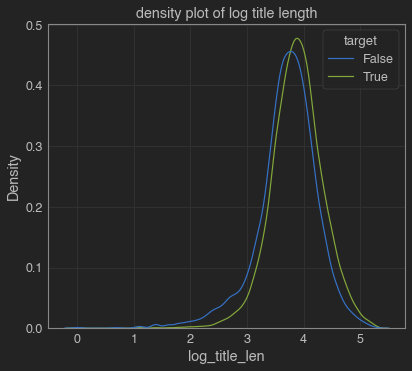

<ipython-input-43-9a0f1ece748d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_selftext_len'] = np.log(train['selftext_len'])


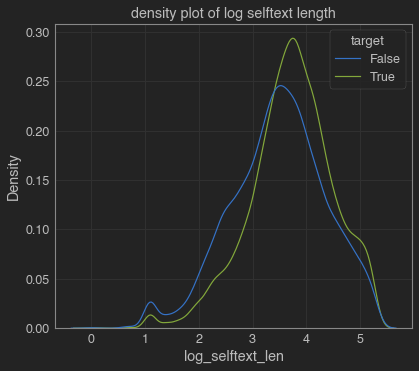

In [ ]:
train['log_title_len'] = np.log(train['title_len'])
sns.kdeplot(x='log_title_len', data=train, hue='target')
plt.title('density plot of log title length')
plt.show()
train['log_selftext_len'] = np.log(train['selftext_len'])
sns.kdeplot(x='log_selftext_len', data=train, hue='target')
plt.title('density plot of log selftext length')
plt.show()

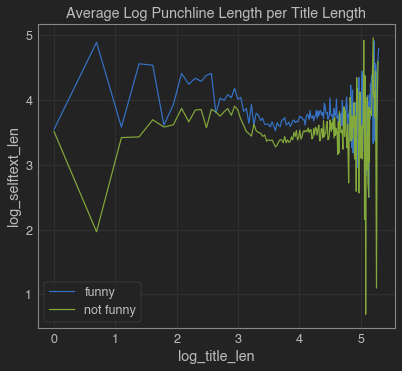

In [ ]:
# title length



sns.lineplot(x='log_title_len', y='log_selftext_len', data = funny_df.groupby('log_title_len', as_index=False).mean(), label='funny')
sns.lineplot(x='log_title_len', y='log_selftext_len', data = not_funny_df.groupby('log_title_len', as_index=False).mean(), label='not funny')
plt.legend()
plt.title('Average Log Punchline Length per Title Length')
plt.show()

# sns.histplot(x='target', data=train.groupby('title_len').mean(), color='red')
# plt.title('Average Target Boolean per Title Length')

Text(0.5, 1.0, 'variation of length')

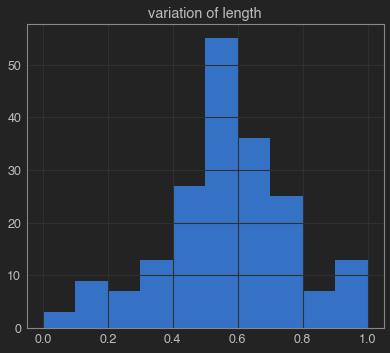

In [ ]:
train.groupby(['title_len']).mean()['target'].hist()
plt.title('variation of length')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

classifier = MultinomialNB()
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

corpus = list(train['all_text'])
X_train = vectorizer.fit_transform(corpus)
y_train = train['target']
X_val = vectorizer.transform(list(val['all_text']))
y_val = val['target']

In [ ]:
model = Pipeline([('vectorizer', vectorizer),
                  ('classifier', classifier)])

model.fit(train['all_text'], train['target'])

predict = model.predict(val['all_text'])
predicted_prob = model.predict_proba(val['all_text'])

Accuracy: 0.68
Auc: 0.68
Detail:
              precision    recall  f1-score   support

       False       0.67      0.71      0.69      1995
        True       0.69      0.66      0.67      2001

    accuracy                           0.68      3996
   macro avg       0.68      0.68      0.68      3996
weighted avg       0.68      0.68      0.68      3996



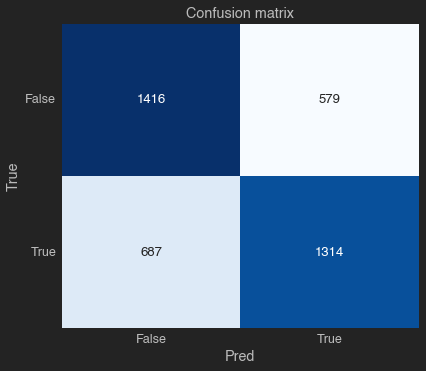

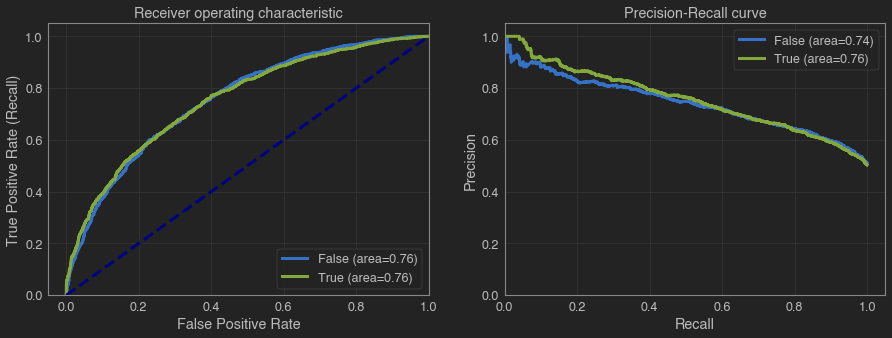

In [ ]:
evaluate_model(val['target'], predict, predicted_prob)

In [ ]:
tokenized_title = train['title'].apply(lambda x:x.split())

import gensim

model_w2v = gensim.models.Word2Vec(
    tokenized_title,
    # dimension (feature numbers)
    vector_size=300,
    # size of context window
    window = 10,
    min_count=2,
    sg = 1,
    hs = 0,
    negative = 10,
    workers = 2,
)
model_w2v.train(tokenized_title, total_examples=len(train['title']), epochs=20)

(5016757, 6955300)

In [ ]:
for word in top_funny_words:
    print(word, '\n')
    most_similar_words = model_w2v.wv.most_similar(positive=f'{word}')
    for sim_word, score in most_similar_words:
        print(f"     {sim_word}: {score}")
    print('.....')

NameError: name 'top_funny_words' is not defined

In [ ]:
for word in top_notfunny_words:
    print(word, '\n')
    most_similar_words = model_w2v.wv.most_similar(positive=f'{word}')
    for sim_word, score in most_similar_words:
        print(f"     {sim_word}: {score}")
    print('.....')

NameError: name 'top_notfunny_words' is not defined

In [ ]:
# selftext length
sns.lineplot(x='selftext_len', y='title_len', data = funny_df.groupby('selftext_len', as_index=False).mean(), label='funny')
sns.lineplot(x='selftext_len', y='title_len', data = notfunny_df.groupby('selftext_len', as_index=False).mean(), label='not funny')
plt.legend()
plt.title('Average Title Length per Punchline Length')
plt.show()

# sns.histplot(x='target', data=train.groupby('title_len').mean(), color='red')
# plt.title('Average Target Boolean per Title Length')

In [ ]:
train.groupby(['selftext_len']).mean()['target'].hist()
plt.title('variation of length')

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train['selftext'].astype(str))

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns = ['word', 'freq'])

frequency.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh',color='orange')
plt.title('all words')

In [ ]:
cv_funny = CountVectorizer(stop_words='english')
words = cv_funny.fit_transform(funny_df['selftext'].astype(str))
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv_funny.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

funny_frequency = pd.DataFrame(words_freq, columns = ['word', 'freq'])

funny_frequency.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh')
plt.title('funny')

In [ ]:
cv_notfunny = CountVectorizer(stop_words='english')
words = cv_notfunny.fit_transform(notfunny_df['selftext'].astype(str))
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv_notfunny.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

notfunny_frequency = pd.DataFrame(words_freq, columns = ['word', 'freq'])

notfunny_frequency.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh', color='green')
plt.title('not funny')

In [ ]:
# funny words
top_funny_words = list(set(funny_frequency['word'].head(10)).difference(set(notfunny_frequency['word'].head(10))))
top_notfunny_words = list(set(notfunny_frequency['word'].head(10)).difference(set(funny_frequency['word'].head(10))))

In [ ]:
top_funny_words

In [ ]:
top_notfunny_words

In [ ]:
tokenized_selftext = train['selftext'].apply(lambda x:str(x).lower().split())

import gensim

model_w2v_punchline = gensim.models.Word2Vec(
    tokenized_selftext,
    # dimension (feature numbers)
    vector_size=200,
    # size of context window
    window = 10,
    min_count=2,
    sg = 1,
    hs = 0,
    negative = 10,
    workers = 2,
)
model_w2v_punchline.train(tokenized_title, total_examples=len(train['selftext']), epochs=20)

In [ ]:
for word in top_funny_words:
    print(word, '\n')
    most_similar_words = model_w2v.wv.most_similar(positive=f'{word}')
    for sim_word, score in most_similar_words:
        print(f"     {sim_word}: {score}")
    print('.....')

In [ ]:
for word in top_notfunny_words:
    print(word, '\n')
    most_similar_words = model_w2v.wv.most_similar(positive=f'{word}')
    for sim_word, score in most_similar_words:
        print(f"     {sim_word}: {score}")
    print('.....')

In [ ]:
# def sample_jokes(dataframe, num_jokes=10, tokenize=False):
#     if tokenize:
#         for i in range(num_jokes):
#             joke = train[['title', 'selftext', 'target']].sample(1)
#             print(f'Joke #{i+1}')
#             print(joke['title'].iloc[0].split(' '))
#             print('.....................')
#             print(joke['selftext'].iloc[0].split(' '))
#             print('Is It Funny? ----> ', joke['target'].iloc[0])
#             print('\n')
        
#     for i in range(num_jokes):
#         joke = train[['title', 'selftext', 'target']].sample(1)
#         print(f'Joke #{i+1}')
#         print(joke['title'].iloc[0])
#         print('.....................')
#         print(joke['selftext'].iloc[0])
#         print('Is It Funny? ----> ', joke['target'].iloc[0])
#         print('\n')
# sample_jokes(train, 10, tokenize=True)

In [ ]:
# funny_words = []
# for i, row in funny_df[['title', 'selftext']].iterrows():
#     funny_words_title = [word for word in row['title'].split()]
#     funny_words.append(funny_words_title)
#     funny_words_selftext = [word for word in row['selftext'].split()]
#     funny_words.append(funny_words_selftext)
    
# funny_words_vocab = set(funny_words)

# not_funny_words = []
# for i, row in not_funny_df[['title', 'selftext']].iterrows():
#     not_funny_words_title = [word for word in row['title'].split()]
#     not_funny_words.append(not_funny_words_title)
#     not_funny_words_selftext = [word for word in row['selftext'].split()]
#     not_funny_words.append(not_funny_words_selftext)
    
# not_funny_words_vocab = set(not_funny_words)

TypeError: unhashable type: 'list'

In [ ]:
# # unique words 
# from sklearn.feature_extraction.text import CountVectorizer

# cv_funny = CountVectorizer(stop_words=None)
# cv_not_funny = CountVectorizer(stop_words=None)

# cv_funny.fit_transform(funny_df['title'])
# cv_not_funny.fit_transform(not_funny_df['title'])
# funny_words = set(cv_funny.vocabulary_.keys())
# not_funny_words = set(cv_not_funny.vocabulary_.keys())
# # get unique words that are only in funny/not funny entries
# funny_words_title = list((funny_words).difference(not_funny_words))
# not_funny_words_title = list((not_funny_words).difference(funny_words))
# # funny_words_selftext = list(set(funny_frequency['selftext']).difference(set(notfunny_frequency['selftext'])))
# # not_funny_words_selftext = list(set(notfunny_frequency['selftext']).difference(set(funny_frequency['selftext'])))
# cv_funny.fit_transform(funny_df['selftext'])
# cv_not_funny.fit_transform(not_funny_df['selftext'])
# funny_words = set(cv_funny.vocabulary_.keys())
# not_funny_words = set(cv_not_funny.vocabulary_.keys())
# # get unique words that are only in funny/not funny entries
# funny_words_selftext = list((funny_words).difference(not_funny_words))
# not_funny_words_selftext = list((not_funny_words).difference(funny_words))

In [ ]:
# cv_funny_title = CountVectorizer(stop_words=None, vocabulary = funny_words_title)
# cv_funny_selftext = CountVectorizer(stop_words=None, vocabulary = funny_words_selftext)
# words_title = cv_funny_title.fit_transform(funny_df['title'])
# words_selftext = cv_funny_selftext.fit_transform(funny_df['selftext'])
# sum_words_title = words_title.sum(axis=0)
# sum_words_selftext = words_selftext.sum(axis=0)

# words_freq_title = [(word, sum_words[0, i]) for word, i in cv_funny_titles.vocabulary_.items()]
# words_freq_title = sorted(words_freq_title, key = lambda x: x[1], reverse=True)
# words_freq_selftext = [(word, sum_words[0, i]) for word, i in cv_funny_selftext.vocabulary_.items()]
# words_freq_selftext = sorted(words_freq_selftext, key = lambda x: x[1], reverse=True)

# funny_frequency_title = pd.DataFrame(words_freq_title, columns = ['word', 'freq'])
# funny_frequency_selftext = pd.DataFrame(words_freq_selftext, columns = ['word', 'freq'])

# funny_frequency_title.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh')
# funny_frequency_selftext.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh')
# plt.title('Most Common Words that are only in funny titles')
# plt.show()

In [ ]:
# cv_not_funny_title = CountVectorizer(stop_words=None, vocabulary = not_funny_words_title)
# cv_not_funny_selftext = CountVectorizer(stop_words=None, vocabulary = not_funny_words_selftext)
# words_title = cv_not_funny_title.fit_transform(funny_df['title'])
# words_selftext = cv_not_funny_selftext.fit_transform(funny_df['selftext'])
# sum_words_title = words_title.sum(axis=0)
# sum_words_selftext = words_selftext.sum(axis=0)

# words_freq_title = [(word, sum_words[0, i]) for word, i in cv_not_funny_title.vocabulary_.items()]
# words_freq_title = sorted(words_freq_title, key = lambda x: x[1], reverse=True)
# words_freq_selftext = [(word, sum_words[0, i]) for word, i in cv_not_funny_selftext.vocabulary_.items()]
# words_freq_selftext = sorted(words_freq_selftext, key = lambda x: x[1], reverse=True)

# funny_frequency_title = pd.DataFrame(words_freq_title, columns = ['word', 'freq'])
# funny_frequency_selftext = pd.DataFrame(words_freq_selftext, columns = ['word', 'freq'])

# funny_frequency_title.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh')
# funny_frequency_selftext.head(30).sort_values(by='freq').plot(x='word', y='freq', kind='barh')
# plt.title('Most Common Words that are only in funny titles')
# plt.show()

In [ ]:
# def plot_window_size_by_output(freq_table_a, freq_table_b, min_window_size=1, max_window_size=10000):
#     from tqdm import tqdm
#     num_elements_freq_a = []
#     window_sizes = []
    
#     for window_size in tqdm(range(min_window_size, max_window_size + 1)):
#         elements_only_in_a = list(set(freq_table_a['word'].head(window_size)).difference(set(freq_table_b['word'].head(window_size))))
#         elements_only_in_b = list(set(freq_table_b['word'].head(window_size)).difference(set(freq_table_a['word'].head(window_size))))
        
#         num_elements_freq_a.append(len(elements_only_in_a))
#         window_sizes.append(window_size)
        
#     sns.lineplot(x = window_sizes, y=num_elements_freq_a, color='blue')
#     plt.xlabel('window sizes')
#     plt.ylabel('number of unique words')
#     plt.show()


In [ ]:
# df_dt = df_concat.set_index('created_at', drop=True).sort_index()
# # get difference in time and find relative frequency from the lag
# res = (pd.Series(df_dt.index[1:]) - pd.Series(df_dt.index[:-1])).value_counts()
# full_rng = pd.date_range(df_dt.index[0], df_dt.index[-1], freq=res.index[0])

#TODO look at reading level
- vocab
- statistical correlations
- probability tests
- Topic Modeling for filtering
- Stopwords include/not include
- Check stopwords, add stop words
- humor types: dark, dry, crass humor, NSFW (audience type)
- joke similarity (clustering)